In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

from processing import load_parquet_files

In [2]:
BASE_DIR = Path.cwd()
DATA_DIR = BASE_DIR / 'datos' / 'datos_prueba'
assert DATA_DIR.is_dir()

In [3]:
df = load_parquet_files(DATA_DIR)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884393 entries, 0 to 884392
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   id                            884393 non-null  int64 
 1   text                          884393 non-null  object
 2   created_at                    884393 non-null  object
 3   lang                          884393 non-null  object
 4   entities.urls                 884393 non-null  object
 5   entities.user_mentions        884393 non-null  object
 6   entities.hashtags             884393 non-null  object
 7   user.id                       884393 non-null  int64 
 8   user.description              884393 non-null  object
 9   user.location                 884393 non-null  object
 10  user.name                     884393 non-null  object
 11  user.screen_name              884393 non-null  object
 12  user.url                      884393 non-null  object
 13 

In [22]:
hashtag_counts = df[df['entities.hashtags'] != ""]['entities.hashtags'].str.split('|').explode().value_counts()

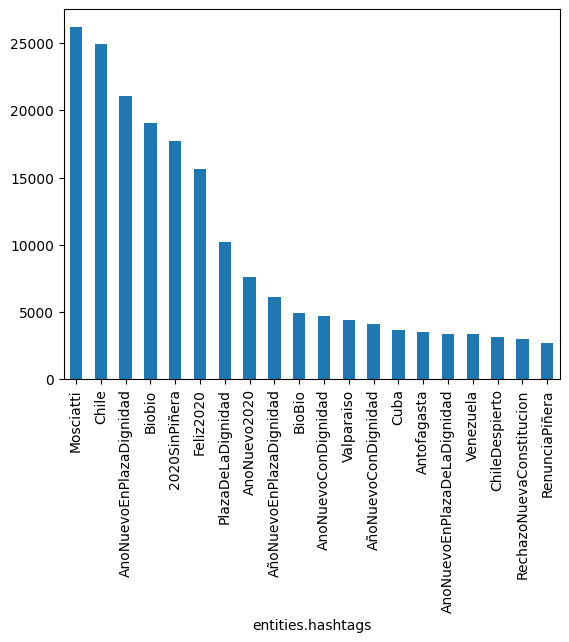

In [24]:
hashtag_counts.head(20).plot(kind='bar')
plt.show()

In [30]:
def score_text(text, left_keywords, right_keywords):
    left_score = sum(keyword in text.lower() for keyword in left_keywords)
    right_score = sum(keyword in text.lower() for keyword in right_keywords)
    return left_score, right_score

In [31]:
left_keywords = [
    "protestas", "manifestaciones", "igualdad", "justicia social", "dignidad",
    "derechos humanos", "educación gratuita", "salud pública", "pensiones dignas",
    "pueblo", "democracia", "reforma", "constitución nueva", "cambio social",
    "derechos laborales", "movilización", "no más AFP", "violencia policial",
    "desigualdad", "pobreza", "acceso a la educación", "redistribución",
    "derecho a la vivienda", "derecho a la salud", "estado de emergencia",
    "derecho a la protesta", "territorio mapuche", "estado plurinacional",
    "privatización", "austeridad", "acceso a servicios básicos", "autonomía",
    "interculturalidad", "derecho al agua", "derecho al trabajo", "participación ciudadana",
    "feminismo", "ni una menos", "patriarcado", "lucha de clases", "anticapitalismo",
    "antineoliberalismo", "derecho a la identidad", "memoria histórica", "justicia transicional",
    "crisis social", "derecho a decidir", "constituyente", "plebiscito", "reivindicación social",
    "derechos de los pueblos originarios"
]

right_keywords = [
    "orden", "seguridad", "estado de derecho", "constitución actual", "libertad económica",
    "libre mercado", "inversión extranjera", "crecimiento económico", "desarrollo",
    "emprendimiento", "empresarios", "propiedad privada", "derechos individuales", "estabilidad",
    "paz social", "control de disturbios", "fuerzas armadas", "carabineros", "autoridad",
    "respeto a la ley", "inmigración", "control migratorio", "terrorismo", "subversión",
    "delincuencia", "seguridad ciudadana", "pacificación", "desarrollo sustentable",
    "reforma tributaria", "reducción de impuestos", "privatización", "iniciativa privada",
    "globalización", "competitividad", "innovación", "productividad", "eficiencia",
    "alianza público-privada", "estado mínimo", "regulación económica", "mercado laboral",
    "derecho a la propiedad", "inversión privada", "emprendedores", "creación de empleo",
    "progreso", "seguridad pública", "paz y orden", "fortalecimiento institucional",
    "desarrollo regional"
]


In [32]:
df['left_score'], df['right_score'] = zip(*df['text'].apply(lambda x: score_text(x, left_keywords, right_keywords)))

In [50]:
date_series_parsed = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S %z %Y")

In [54]:
df['datetime'] = date_series_parsed
df['date'] = df['datetime'].dt.date

In [55]:
data = df[df['datetime'].dt.year >= 2020].groupby('date')[['left_score', 'right_score']].sum()

<Axes: xlabel='date'>

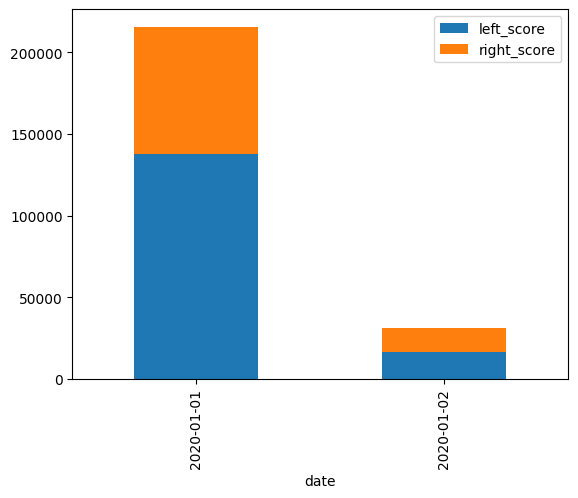

In [57]:
# stacked bar plot, x is date, y is left_score and right_score, stacked
data.plot(kind='bar', stacked=True)